In [1]:
%run Pre-Processing.ipynb

In [2]:
%run Models.ipynb

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [4]:
SVM_f1 = dict()
KNN_f1 = dict()
RFC_f1 = dict()
LGBM_f1 = dict()
XGB_f1 = dict()
CB_f1 = dict()

In [5]:
def fisher_score_func(X, y):
    classes = np.unique(y)
    n_samples, n_features = X.shape
    overall_mean = np.mean(X, axis=0)
    overall_var = np.var(X, axis=0)
    between_class_var = np.zeros(n_features)
    within_class_var = np.zeros(n_features)
    
    for c in classes:
        class_mask = (y == c)
        class_mean = np.mean(X[class_mask], axis=0)
        class_var = np.var(X[class_mask], axis=0)
        class_size = np.sum(class_mask)
        between_class_var += class_size * (class_mean - overall_mean)**2
        within_class_var += (class_size - 1) * class_var
    between_class_var /= (len(classes) - 1)
    within_class_var /= (n_samples - len(classes))
    
    return between_class_var / (within_class_var + 1e-10)

In [15]:
for x in range(71, 10, -10):
    num_feature = x
    print("No of feature", num_feature)
    selector = SelectKBest(score_func=f_classif, k=num_feature)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test_transformed)
    SVM_f1[x] = SVM_selector(X_train_selected, y_train_resampled, X_test_selected, y_test)
    KNN_f1[x] = KNN_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    RFC_f1[x] = RandomForest_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    LGBM_f1[x] = LGBM_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    XGB_f1[x] = XGB_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    CB_f1[x] = CatBoost_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)

No of feature 71
SVM Model:-
[LibSVM]

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9824    0.9591    103560
      Attack     0.2570    0.0840    0.1267      7496

    accuracy                         0.9218    111056
   macro avg     0.5969    0.5332    0.5429    111056
weighted avg     0.8909    0.9218    0.9029    111056


Confusion Matrix:
[[101739   1821]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9393    0.9024    0.9205    103560
      Attack     0.1260    0.1942    0.1528      7496

    accuracy                         0.8546    111056
   macro avg     0.5326    0.5483    0.5367    111056
weighted avg     0.8844    0.8546    0.8687    111056

Confusion Matrix:
[[93456 10104]
 [ 6040  1456]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.1s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9978    0.8603    0.9240    103560
      Attack     0.3353    0.9735    0.4988      7496

    accuracy                         0.8679    111056
   macro avg     0.6665    0.9169    0.7114    111056
weighted avg     0.9531    0.8679    0.8953    111056

Confusion Matrix:
[[89093 14467]
 [  199  7297]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16473
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9357    0.9656    0.9504    103560
      Attack     0.1502    0.0840    0.1078      7496

    accuracy                         0.9061    111056
   macro avg     0.5430    0.5248    0.5291    111056
weighted avg     0.8827    0.9061    0.8936    111056


Confusion Matrix:
[[99995  3565]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9392    0.9028    0.9206    103560
      Attack     0.1257    0.1930    0.1522      7496

    accuracy                         0.8549    111056
   macro avg     0.5324    0.5479    0.5364    111056
weighted avg     0.8843    0.8549    0.8688    111056

Confusion Matrix:
[[93491 10069]
 [ 6049  1447]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.8s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9979    0.8600    0.9238    103560
      Attack     0.3352    0.9748    0.4988      7496

    accuracy                         0.8678    111056
   macro avg     0.6665    0.9174    0.7113    111056
weighted avg     0.9532    0.8678    0.8952    111056

Confusion Matrix:
[[89066 14494]
 [  189  7307]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13944
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9367    0.9812    0.9584    103560
      Attack     0.2444    0.0840    0.1251      7496

    accuracy                         0.9206    111056
   macro avg     0.5905    0.5326    0.5418    111056
weighted avg     0.8900    0.9206    0.9022    111056


Confusion Matrix:
[[101612   1948]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9391    0.9035    0.9210    103560
      Attack     0.1254    0.1910    0.1514      7496

    accuracy                         0.8554    111056
   macro avg     0.5322    0.5473    0.5362    111056
weighted avg     0.8842    0.8554    0.8690    111056

Confusion Matrix:
[[93569  9991]
 [ 6064  1432]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.7s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9972    0.8612    0.9242    103560
      Attack     0.3352    0.9669    0.4978      7496

    accuracy                         0.8683    111056
   macro avg     0.6662    0.9140    0.7110    111056
weighted avg     0.9525    0.8683    0.8954    111056

Confusion Matrix:
[[89184 14376]
 [  248  7248]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11654
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9357    0.9645    0.9499    103560
      Attack     0.1463    0.0840    0.1068      7496

    accuracy                         0.9051    111056
   macro avg     0.5410    0.5243    0.5283    111056
weighted avg     0.8824    0.9051    0.8930    111056


Confusion Matrix:
[[99884  3676]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9389    0.9042    0.9212    103560
      Attack     0.1236    0.1866    0.1487      7496

    accuracy                         0.8558    111056
   macro avg     0.5312    0.5454    0.5349    111056
weighted avg     0.8838    0.8558    0.8691    111056

Confusion Matrix:
[[93638  9922]
 [ 6097  1399]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9974    0.8611    0.9242    103560
      Attack     0.3354    0.9685    0.4982      7496

    accuracy                         0.8683    111056
   macro avg     0.6664    0.9148    0.7112    111056
weighted avg     0.9527    0.8683    0.8955    111056

Confusion Matrix:
[[89173 14387]
 [  236  7260]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9557
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9350    0.9545    0.9447    103560
      Attack     0.1179    0.0840    0.0981      7496

    accuracy                         0.8957    111056
   macro avg     0.5265    0.5193    0.5214    111056
weighted avg     0.8799    0.8957    0.8875    111056


Confusion Matrix:
[[98845  4715]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9387    0.9047    0.9214    103560
      Attack     0.1229    0.1845    0.1475      7496

    accuracy                         0.8561    111056
   macro avg     0.5308    0.5446    0.5345    111056
weighted avg     0.8837    0.8561    0.8692    111056

Confusion Matrix:
[[93689  9871]
 [ 6113  1383]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9984    0.8590    0.9235    103560
      Attack     0.3349    0.9808    0.4993      7496

    accuracy                         0.8672    111056
   macro avg     0.6667    0.9199    0.7114    111056
weighted avg     0.9536    0.8672    0.8949    111056

Confusion Matrix:
[[88961 14599]
 [  144  7352]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7260
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9136    0.7009    0.7932    103560
      Attack     0.0199    0.0840    0.0322      7496

    accuracy                         0.6593    111056
   macro avg     0.4668    0.3925    0.4127    111056
weighted avg     0.8533    0.6593    0.7419    111056


Confusion Matrix:
[[72586 30974]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9385    0.9042    0.9211    103560
      Attack     0.1207    0.1816    0.1450      7496

    accuracy                         0.8555    111056
   macro avg     0.5296    0.5429    0.5330    111056
weighted avg     0.8833    0.8555    0.8687    111056

Confusion Matrix:
[[93643  9917]
 [ 6135  1361]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   44.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9987    0.8581    0.9231    103560
      Attack     0.3344    0.9849    0.4993      7496

    accuracy                         0.8666    111056
   macro avg     0.6666    0.9215    0.7112    111056
weighted avg     0.9539    0.8666    0.8945    111056

Confusion Matrix:
[[88863 14697]
 [  113  7383]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4946
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
     

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9161    0.7235    0.8085    103560
      Attack     0.0215    0.0840    0.0343      7496

    accuracy                         0.6803    111056
   macro avg     0.4688    0.4038    0.4214    111056
weighted avg     0.8557    0.6803    0.7562    111056


Confusion Matrix:
[[74925 28635]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9381    0.9043    0.9209    103560
      Attack     0.1171    0.1753    0.1404      7496

    accuracy                         0.8551    111056
   macro avg     0.5276    0.5398    0.5306    111056
weighted avg     0.8827    0.8551    0.8682    111056

Confusion Matrix:
[[93650  9910]
 [ 6182  1314]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9995    0.8568    0.9226    103560
      Attack     0.3344    0.9941    0.5005      7496

    accuracy                         0.8660    111056
   macro avg     0.6669    0.9254    0.7116    111056
weighted avg     0.9546    0.8660    0.8942    111056

Confusion Matrix:
[[88727 14833]
 [   44  7452]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2396
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
     

In [16]:
def print_plot(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    plt.figure(figsize=(8, 6))
    plt.plot(keys, values, marker='o', linestyle='-', color='b')
    plt.xlabel('No of Features')
    plt.ylabel('F1-Score')
    plt.title('No of Features vs F1-Score')
    plt.grid(True)
    plt.show()

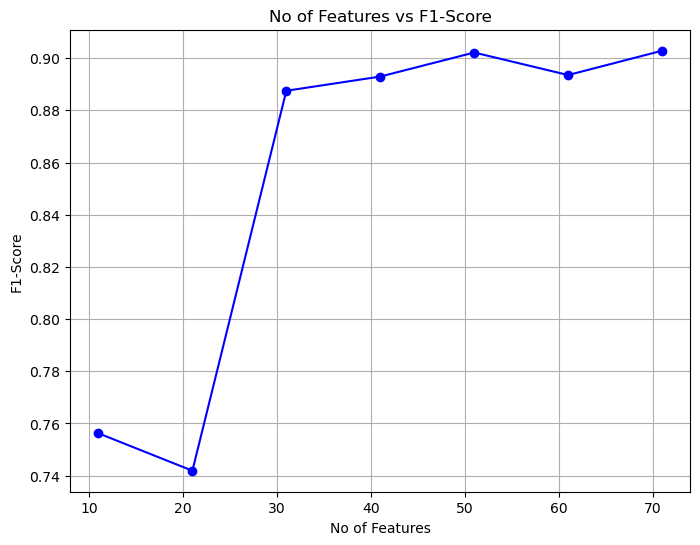

In [17]:
print_plot(SVM_f1)

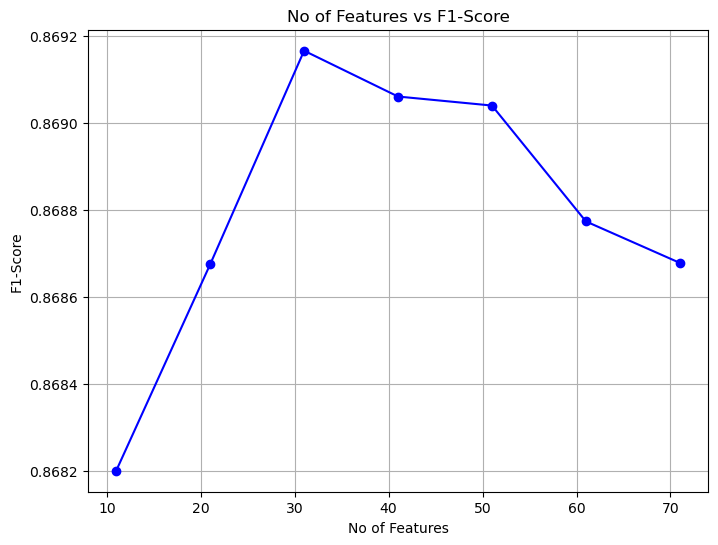

In [18]:
print_plot(KNN_f1)

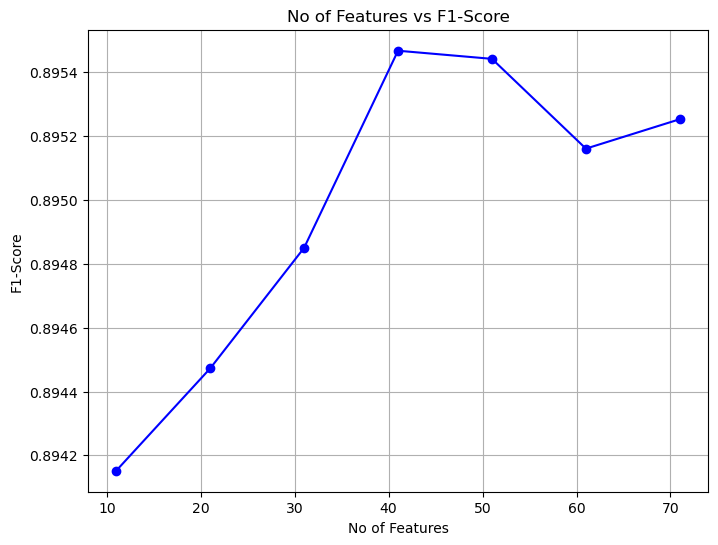

In [19]:
print_plot(RFC_f1)

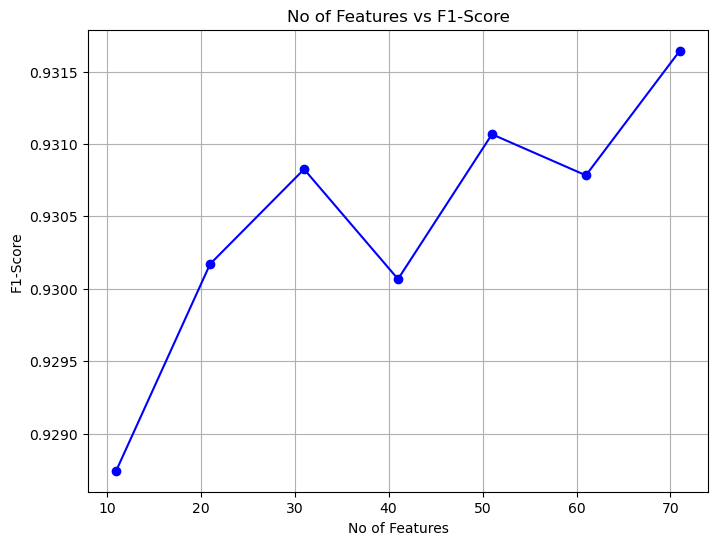

In [20]:
print_plot(LGBM_f1)

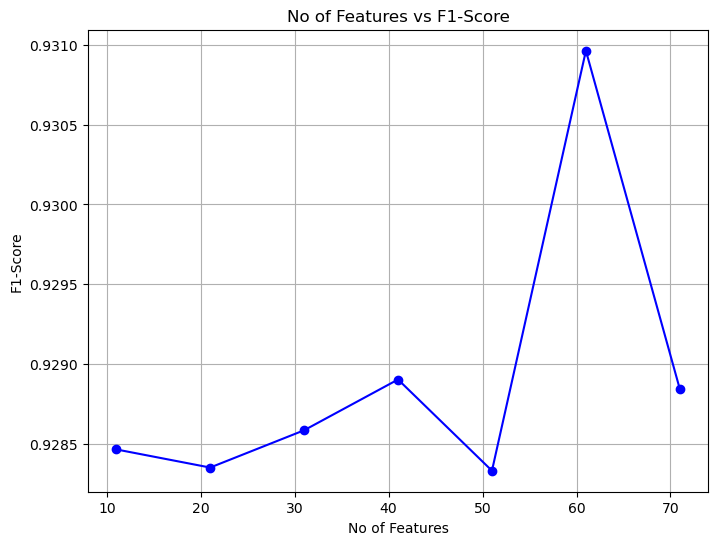

In [21]:
print_plot(XGB_f1)

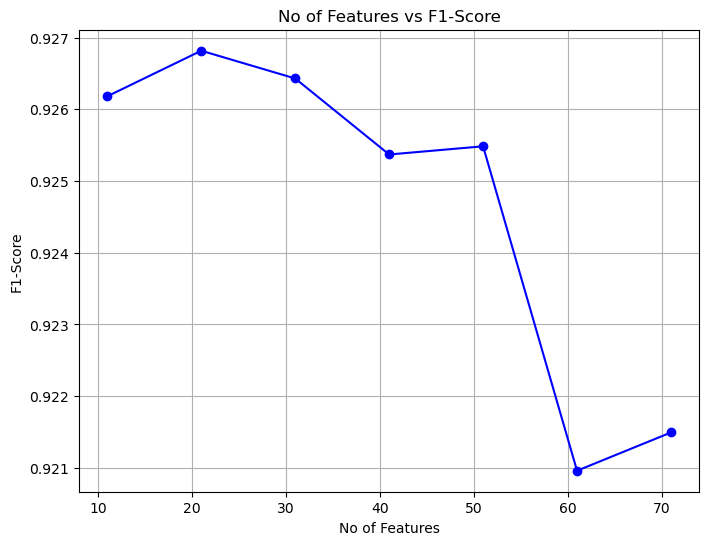

In [22]:
print_plot(CB_f1)